# 01 - Data Acquisition
Fetching NIFTY 50 Spot, Futures, and Options data

In [10]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

from src.data_utils import (
    fetch_nifty_spot,
    generate_futures_data,
    generate_options_data,
    run_data_pipeline
)

In [11]:
end_date = datetime.now().strftime('%Y-%m-%d')
start_date = (datetime.now() - timedelta(days=365)).strftime('%Y-%m-%d')

print(f"Data Range: {start_date} to {end_date}")

Data Range: 2025-01-16 to 2026-01-16


In [12]:
data = run_data_pipeline(start_date=start_date, end_date=end_date, data_dir='../data')

Fetching NIFTY spot data from 2025-01-16 to 2026-01-16...


$^NSEI: possibly delisted; no price data found  (5m 2025-01-16 -> 2026-01-16) (Yahoo error = "5m data not available for startTime=1736965800 and endTime=1768501800. The requested range must be within the last 60 days.")

1 Failed download:
['^NSEI']: possibly delisted; no price data found  (5m 2025-01-16 -> 2026-01-16) (Yahoo error = "5m data not available for startTime=1736965800 and endTime=1768501800. The requested range must be within the last 60 days.")


  Spot data: 19490 rows
Generating futures data...
  Futures data: 19490 rows
Generating options data...
  Options data: 97450 rows
Merging datasets...
  Merged data: 19490 rows
Data pipeline complete!


In [13]:
print("\n=== SPOT DATA ===")
print(f"Shape: {data['spot'].shape}")
print(f"Date Range: {data['spot']['timestamp'].min()} to {data['spot']['timestamp'].max()}")
data['spot'].head()


=== SPOT DATA ===
Shape: (19490, 6)
Date Range: 2025-01-16 09:15:00 to 2026-01-16 12:55:00


,timestamp,open,high,low,close,volume
0,2025-01-16 09:15:00,22000.000000,22039.687635,21972.472913,22011.370649,5909734
1,2025-01-16 09:20:00,22011.370649,22028.531533,21973.322484,22008.742873,4705479
2,2025-01-16 09:25:00,22008.742873,22044.638233,21930.025636,22023.570468,2016527
3,2025-01-16 09:30:00,22023.570468,22059.351037,21955.816351,22057.868672,2617294
4,2025-01-16 09:35:00,22057.868672,22074.789770,22040.942025,22053.101978,5063774


In [14]:
print("\n=== FUTURES DATA ===")
print(f"Shape: {data['futures'].shape}")
print(f"Contracts: {data['futures']['contract_month'].unique()}")
data['futures'].head()


=== FUTURES DATA ===
Shape: (19490, 9)
Contracts: ['Jan2025' 'Feb2025' 'Mar2025' 'Apr2025' 'May2025' 'Jun2025' 'Jul2025'
 'Aug2025' 'Sep2025' 'Oct2025' 'Nov2025' 'Dec2025']


,timestamp,futures_open,futures_high,futures_low,futures_close,futures_volume,futures_oi,contract_month,days_to_expiry
0,2025-01-16 09:15:00,22053.762906,22093.547529,22026.168549,22065.161342,2699364,10573348,Jan2025,13
1,2025-01-16 09:20:00,22052.330019,22069.522836,22014.211053,22049.697353,1566393,7289526,Jan2025,13
2,2025-01-16 09:25:00,22055.529431,22091.501098,21976.644856,22070.388547,848898,5025489,Jan2025,13
3,2025-01-16 09:30:00,22068.666167,22104.520000,22000.773315,22103.034600,938202,7510715,Jan2025,13
4,2025-01-16 09:35:00,22118.397784,22135.365315,22101.424688,22113.618009,2482505,6403824,Jan2025,13


In [15]:
print("\n=== OPTIONS DATA ===")
print(f"Shape: {data['options'].shape}")
print(f"Strikes per timestamp: {data['options'].groupby('timestamp')['strike'].count().iloc[0]}")
data['options'].head(10)


=== OPTIONS DATA ===
Shape: (97450, 12)
Strikes per timestamp: 5


,timestamp,strike,call_ltp,call_iv,call_oi,call_volume,put_ltp,put_iv,put_oi,put_volume,is_atm,strike_offset
0,2025-01-16 09:15:00,21900,301.21,0.1191,95442,9205,190.52,0.1287,112563,5751,False,-2
1,2025-01-16 09:15:00,21950,233.14,0.1039,102573,5260,166.76,0.1177,92938,8238,False,-1
2,2025-01-16 09:15:00,22000,197.27,0.1155,86467,2443,186.00,0.1266,93675,4774,True,0
3,2025-01-16 09:15:00,22050,194.76,0.1136,106557,9529,223.85,0.1201,91284,6877,False,1
4,2025-01-16 09:15:00,22100,191.26,0.1126,110717,5655,277.89,0.1251,90097,4896,False,2
5,2025-01-16 09:20:00,21900,304.57,0.1200,88744,1648,190.65,0.1280,107288,8778,False,-2
6,2025-01-16 09:20:00,21950,267.00,0.1240,79360,4823,210.45,0.1308,99662,6325,False,-1
7,2025-01-16 09:20:00,22000,220.40,0.1272,109358,5952,211.87,0.1392,93981,8271,True,0
8,2025-01-16 09:20:00,22050,210.59,0.1220,92155,3403,243.97,0.1288,124893,7443,False,1
9,2025-01-16 09:20:00,22100,210.27,0.1226,80546,5801,298.86,0.1289,99575,2628,False,2


In [16]:
print("\n=== MERGED DATA ===")
print(f"Shape: {data['merged'].shape}")
print(f"Columns: {list(data['merged'].columns)}")
data['merged'].head()


=== MERGED DATA ===
Shape: (19490, 27)
Columns: ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'futures_open', 'futures_high', 'futures_low', 'futures_close', 'futures_volume', 'futures_oi', 'contract_month', 'days_to_expiry', 'atm_strike', 'atm_call_ltp', 'atm_call_iv', 'atm_call_oi', 'atm_call_volume', 'atm_put_ltp', 'atm_put_iv', 'atm_put_oi', 'atm_put_volume', 'total_call_oi', 'total_put_oi', 'total_call_volume', 'total_put_volume']


,timestamp,open,high,low,close,volume,futures_open,futures_high,futures_low,futures_close,...,atm_call_oi,atm_call_volume,atm_put_ltp,atm_put_iv,atm_put_oi,atm_put_volume,total_call_oi,total_put_oi,total_call_volume,total_put_volume
0,2025-01-16 09:15:00,22000.000000,22039.687635,21972.472913,22011.370649,5909734,22053.762906,22093.547529,22026.168549,22065.161342,...,86467,2443,186.00,0.1266,93675,4774,501756,480557,32092,30536
1,2025-01-16 09:20:00,22011.370649,22028.531533,21973.322484,22008.742873,4705479,22052.330019,22069.522836,22014.211053,22049.697353,...,109358,5952,211.87,0.1392,93981,8271,450163,525399,21627,33445
2,2025-01-16 09:25:00,22008.742873,22044.638233,21930.025636,22023.570468,2016527,22055.529431,22091.501098,21976.644856,22070.388547,...,110942,3786,197.94,0.1118,115826,6379,466538,548264,24736,31089
3,2025-01-16 09:30:00,22023.570468,22059.351037,21955.816351,22057.868672,2617294,22068.666167,22104.520000,22000.773315,22103.034600,...,95880,7108,215.14,0.1267,119937,3387,476151,516543,28583,27450
4,2025-01-16 09:35:00,22057.868672,22074.789770,22040.942025,22053.101978,5063774,22118.397784,22135.365315,22101.424688,22113.618009,...,112192,6408,174.64,0.1004,97067,6575,480523,513496,20844,34971


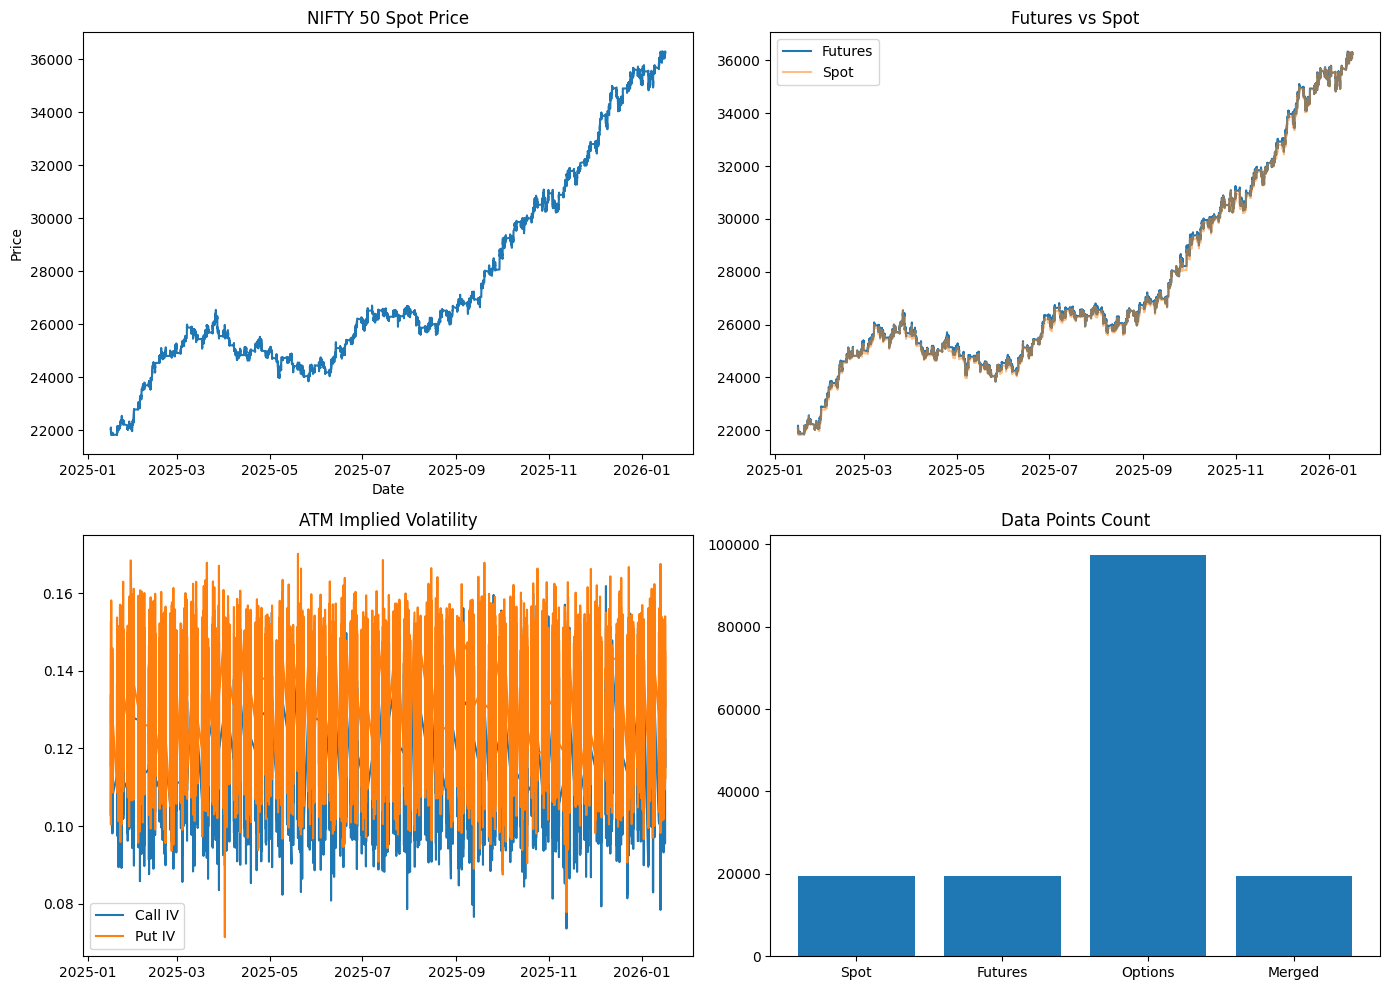

In [17]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].plot(data['spot']['timestamp'], data['spot']['close'])
axes[0, 0].set_title('NIFTY 50 Spot Price')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Price')

axes[0, 1].plot(data['futures']['timestamp'], data['futures']['futures_close'], label='Futures')
axes[0, 1].plot(data['spot']['timestamp'], data['spot']['close'], alpha=0.5, label='Spot')
axes[0, 1].set_title('Futures vs Spot')
axes[0, 1].legend()

atm_options = data['options'][data['options']['is_atm'] == True]
axes[1, 0].plot(atm_options['timestamp'], atm_options['call_iv'], label='Call IV')
axes[1, 0].plot(atm_options['timestamp'], atm_options['put_iv'], label='Put IV')
axes[1, 0].set_title('ATM Implied Volatility')
axes[1, 0].legend()

axes[1, 1].bar(['Spot', 'Futures', 'Options', 'Merged'], 
               [len(data['spot']), len(data['futures']), len(data['options']), len(data['merged'])])
axes[1, 1].set_title('Data Points Count')

plt.tight_layout()
plt.savefig('../plots/01_data_overview.png', dpi=150)
plt.show()

In [18]:
print("\nData files saved:")
print("  - data/nifty_spot_5min.csv")
print("  - data/nifty_futures_5min.csv")
print("  - data/nifty_options_5min.csv")
print("  - data/nifty_merged_5min.csv")
print("  - data/data_cleaning_report.txt")


Data files saved:
  - data/nifty_spot_5min.csv
  - data/nifty_futures_5min.csv
  - data/nifty_options_5min.csv
  - data/nifty_merged_5min.csv
  - data/data_cleaning_report.txt
